In [1]:
import pandas as pd
from tqdm import tqdm
from PIL import Image
import numpy as np
from tensorflow import keras
import utils
from matplotlib import pyplot as plt
import api

In [2]:
# Make debugging csv temp_features.csv
# df = pd.read_csv("data/features/boyner.csv")
# df.iloc[:3000].to_csv("temp_features.csv")

In [3]:
featex = api.API(model_name = "pretrained-mobilenet-v2-1-100", debug = False)

Loading feature extractor module..
Loading data


  0%|          | 62/99986 [00:00<02:42, 613.06it/s]

Loading features


100%|██████████| 99986/99986 [02:51<00:00, 583.78it/s]


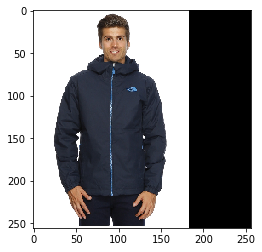

In [4]:
img = Image.open("data/boyner_images/1420.jpg")
img = utils.preprocess(img, size = (256, 256))
img = np.array(img).astype(np.float32)
plt.imshow(img.astype(np.uint8))
plt.show()

In [5]:
query_df = featex._get_closest_neighbors(img, k=49)

In [6]:
res_imgs = []
for _, row in tqdm(query_df.iterrows()):
    _img = Image.open(row['local_path'])
    _img = utils.preprocess(_img, size = (256, 256))
    _img = np.array(_img)
    res_imgs.append(_img)

49it [00:02, 23.61it/s]


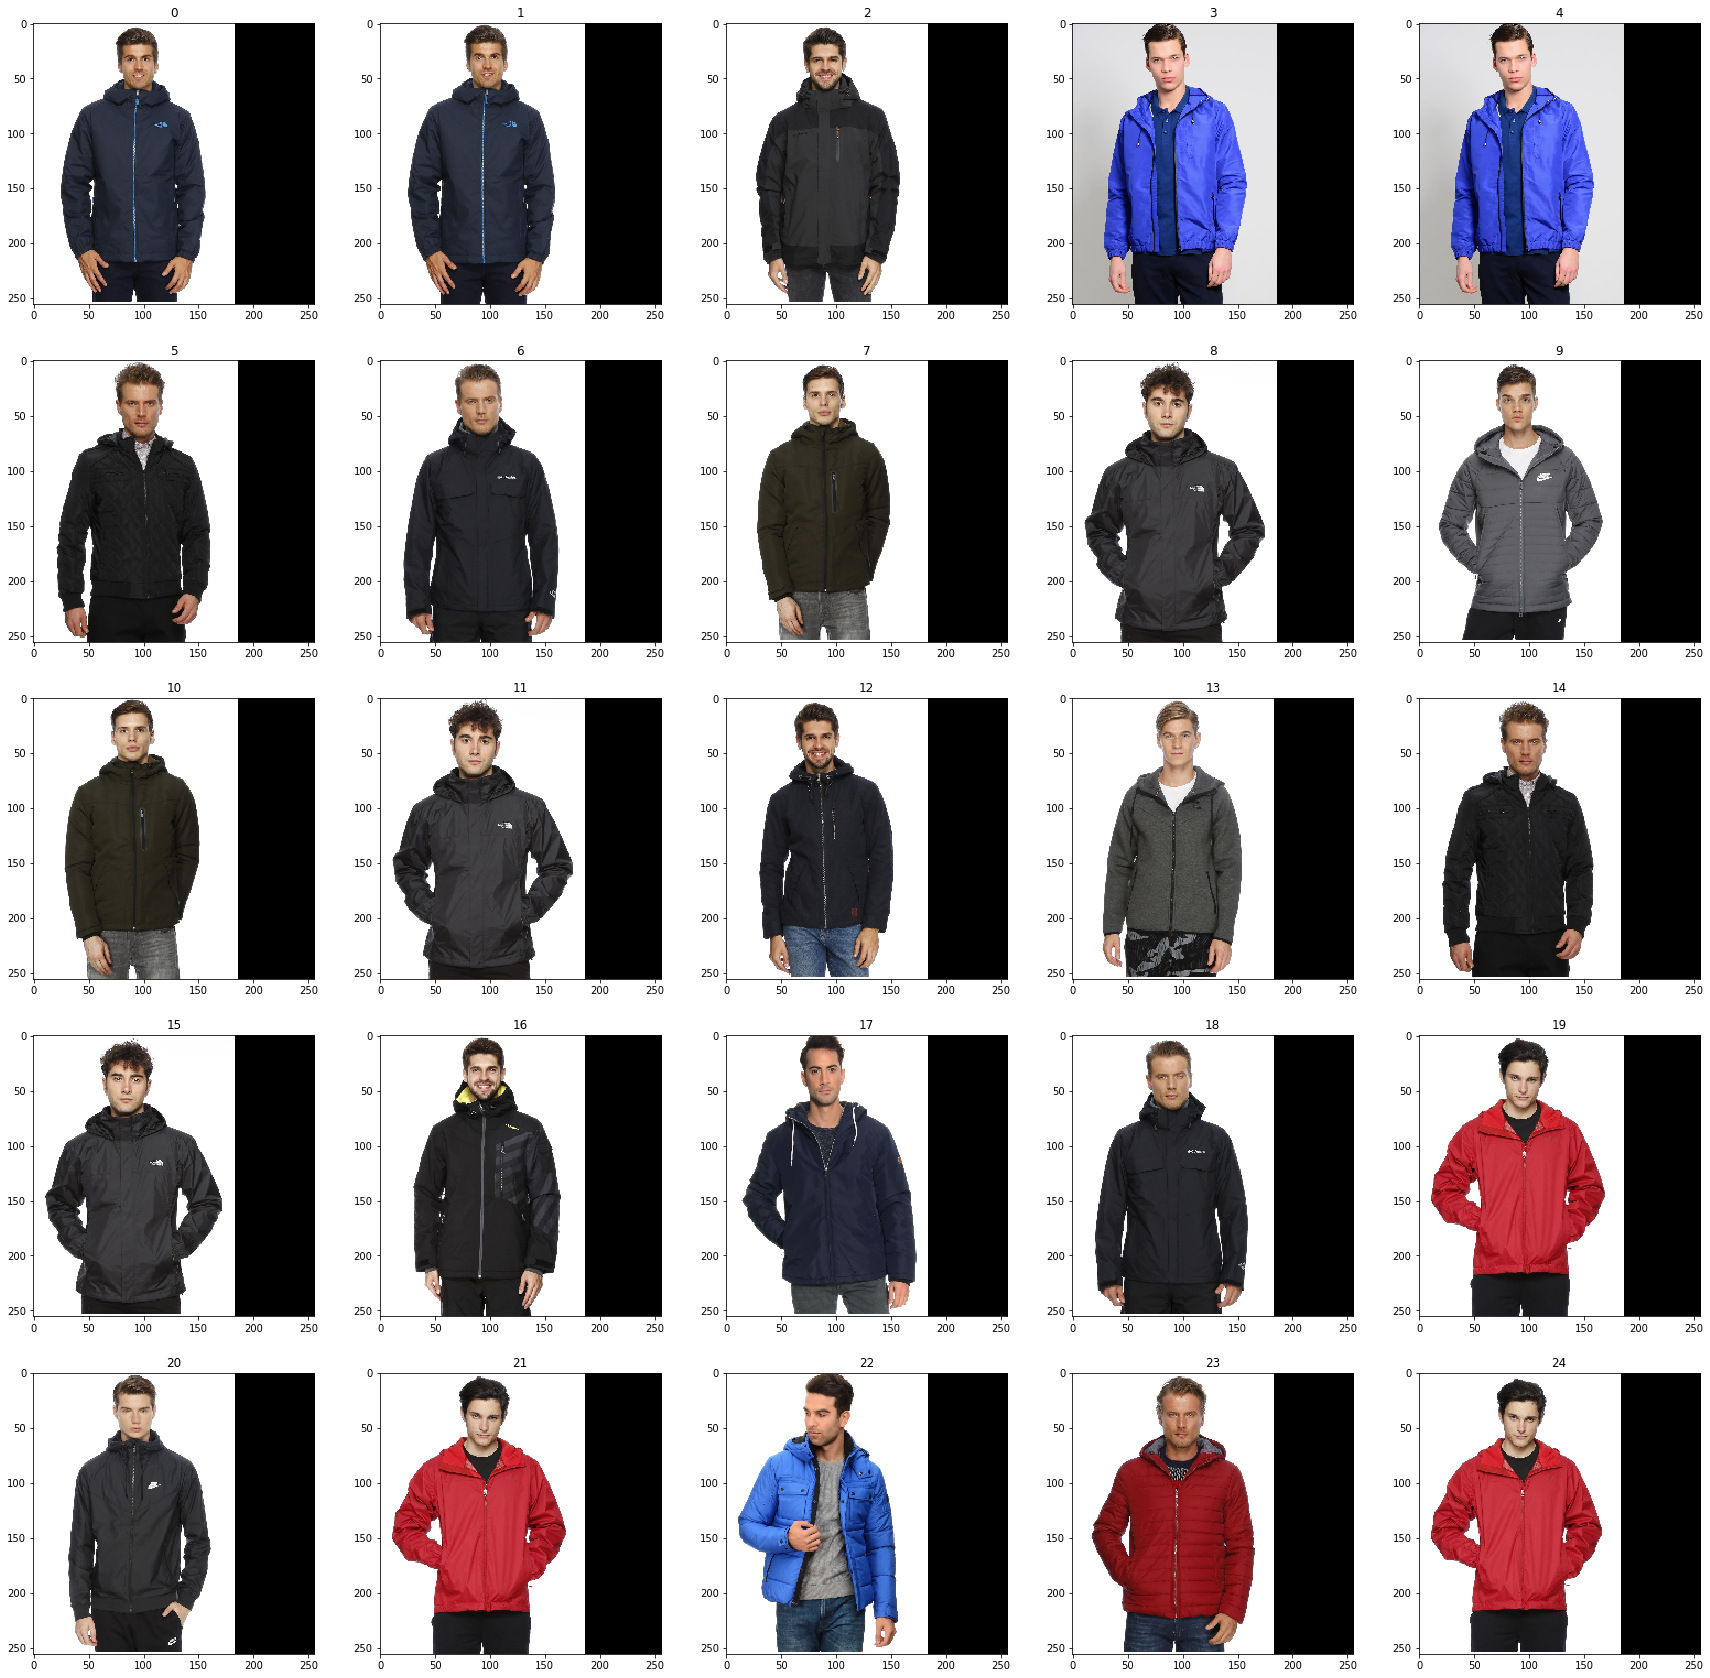

In [7]:
fig, axes = plt.subplots(5, 5, figsize = (30, 30))
axes = axes.flatten()
assert len(axes) <= len(res_imgs)
for i, ax in enumerate(axes):
    ax.imshow(res_imgs[i].astype(np.uint8))
    ax.set_title("%i"%i)
plt.show()